## Import Statements

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Stock News

In [2]:
from bs4 import BeautifulSoup
import requests
import yfinance as yf
import re

# Script to scrap top5 google news for given company name
def google_query(search_term):
    if "news" not in search_term:
        search_term=search_term+" stock news"
    url=f"https://www.google.com/search?q={search_term}"
    url=re.sub(r"\s","+",url)
    return url

def get_recent_stock_news(company_name):
    # time.sleep(4) #To avoid rate limit error
    headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}

    g_query=google_query(company_name)
    res=requests.get(g_query,headers=headers).text
    soup=BeautifulSoup(res,"html.parser")
    news=[]
    for n in soup.find_all("div","n0jPhd ynAwRc tNxQIb nDgy9d"):
        news.append(n.text)
    for n in soup.find_all("div","IJl0Z"):
        news.append(n.text)

    if len(news)>6:
        news=news[:4]
    else:
        news=news
    news_string=""
    for i,n in enumerate(news):
        news_string+=f"{i}. {n}\n"
    top5_news="Recent News:\n\n"+news_string

    return top5_news


In [3]:
get_recent_stock_news("APPLE")

"Recent News:\n\n0. Warren Buffett Just Shunned His Favorite Stock for the First Time Since \n2018, and It Could Spell Trouble for the S&P 500\n1. Apple Stock In 2025: A Prediction On Where It's Price May Head\n2. DOJ Seeks Google Sale Of Chrome In Antitrust Case. Will Trump Make A \nDifference?\n3. Apple stock: Citi says all eyes are on iOS18.2 release in December\n"

In [ ]:
""" Stock News Topic Clustering

"""

## Stock Data

In [4]:
ticker = "^NSEI"
start_date = "2023-01-01"
end_date = "2023-06-08"
data = yf.download(ticker, start=start_date, end=end_date)

prices = data["Close"]
prices

[*********************100%***********************]  1 of 1 completed


Ticker,^NSEI
Date,
2023-01-02 00:00:00+00:00,18197.449219
2023-01-03 00:00:00+00:00,18232.550781
2023-01-04 00:00:00+00:00,18042.949219
2023-01-05 00:00:00+00:00,17992.150391
2023-01-06 00:00:00+00:00,17859.449219
...,...
2023-06-01 00:00:00+00:00,18487.750000
2023-06-02 00:00:00+00:00,18534.099609
2023-06-05 00:00:00+00:00,18593.849609


In [5]:
import yfinance as yf

# Define the ticker symbol
ticker_symbol = "AAPL"

# Create a Ticker object
ticker = yf.Ticker(ticker_symbol)

# Fetch historical market data
data = ticker.history(period="1y")  # data for the last year
print("Historical Data:")
print(data)

# Fetch basic financials
financials = ticker.financials
print("\nFinancials:")
print(financials)

# Fetch stock actions like dividends and splits
actions = ticker.actions
print("\nStock Actions:")
print(actions)

Historical Data:
                                 Open        High         Low       Close  \
Date                                                                        
2023-11-24 00:00:00-05:00  189.939475  189.969328  188.327378  189.043869   
2023-11-27 00:00:00-05:00  188.994117  189.740461  187.979086  188.864746   
2023-11-28 00:00:00-05:00  188.854783  190.148449  188.476631  189.471756   
2023-11-29 00:00:00-05:00  189.969332  191.153533  188.048749  188.446793   
2023-11-30 00:00:00-05:00  188.914492  189.392163  187.272542  189.023956   
...                               ...         ...         ...         ...   
2024-11-18 00:00:00-05:00  225.250000  229.740005  225.169998  228.020004   
2024-11-19 00:00:00-05:00  226.979996  230.160004  226.660004  228.279999   
2024-11-20 00:00:00-05:00  228.059998  229.929993  225.889999  229.000000   
2024-11-21 00:00:00-05:00  228.880005  230.160004  225.710007  228.520004   
2024-11-22 00:00:00-05:00  228.059998  230.719894  228.0599

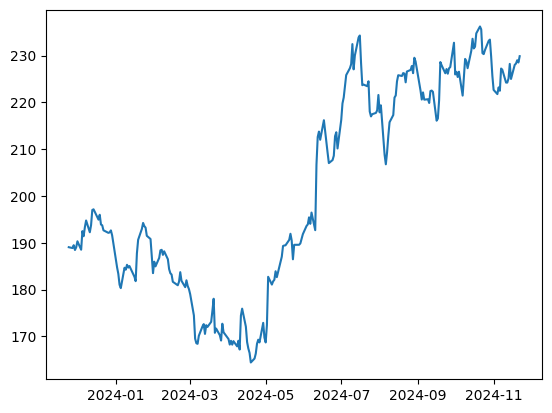

In [6]:
plt.plot(data['Close'])

## Model Building

In [7]:
import keras

In [8]:
aapl_data = data['Close'].values.reshape(-1, 1)

In [80]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
aapl_data_scaled = scaler.fit_transform(aapl_data)

In [82]:
X = []
y = []

for i in range(60, len(aapl_data)):
    X.append(aapl_data_scaled[i-60:i, 0])
    y.append(aapl_data_scaled[i, 0])

train_size = int(len(X) * 0.8)
test_size = len(X) - train_size

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [83]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

print(X_train.shape)

(153, 60, 1)


In [84]:
X_train[0, 0]

array([0.34308644])

In [85]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, AdditiveAttention, Permute, Reshape, Multiply

model = Sequential()

# Adding LSTM layers with return_sequences=True
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [86]:
import tensorflow as tf

# Adding self-attention mechanism
# The attention mechanism
attention = AdditiveAttention(name='attention_weight')
# Permute and reshape for compatibility
model.add(Permute((2, 1)))
model.add(Reshape((-1, X_train.shape[1])))

In [87]:
# attention_result = attention([model.output, model.output])
attention_result = attention([model.get_layer(index=-1).output, model.get_layer(index=-1).output])
multiply_layer = Multiply()([model.get_layer(index=-1).output, attention_result])
# Return to original shape
model.add(Permute((2, 1)))
model.add(Reshape((-1, 50)))

# Adding a Flatten layer before the final Dense layer
model.add(tf.keras.layers.Flatten())

# Final Dense layer
model.add(Dense(1))

# Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error')

In [88]:
from keras.layers import BatchNormalization

# # Adding Dropout and Batch Normalization
# model.add(Dropout(0.2))
# model.add(BatchNormalization())

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [89]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                       │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ permute_11 (Permute)                 │ (None, 50, 60)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_9 (Reshape)                  │ (None, 50, 60)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ permute_12 (Permute)                 │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_10 (Reshape)                 │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 3000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │           3,001 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,601 (131.25 KB)

 Trainable params: 33,601 (131.25 KB)

 Non-trainable params: 0 (0.00 B)

In [90]:
# Train the modelv
history = model.fit(X_train, y_train, epochs=100, batch_size=25, validation_split=0.2)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 153ms/step - loss: 0.2160 - val_loss: 0.0417
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0743 - val_loss: 0.0040
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0421 - val_loss: 0.0338
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0266 - val_loss: 0.0042
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0174 - val_loss: 0.1075
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0122 - val_loss: 0.2100
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0076 - val_loss: 0.2182
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0072 - val_loss: 0.3363
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0057 - val_loss: 0.2372
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0062 - val_loss: 0.2620
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0055 - val_loss: 0.2187
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.0056 - val_l

## Evaluation

In [93]:
X_test, y_test = np.array(X_test), np.array(y_test)
print(X_test.shape)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(39, 60)
(39, 60, 1)


In [94]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Making predictions
y_pred = model.predict(X_test)

# Calculating MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Mean Absolute Error: ", mae)
print("Root Mean Square Error: ", rmse)

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 302ms/step
Mean Absolute Error:  0.43034154912043876
Root Mean Square Error:  0.432240119776421


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [95]:
y_test

array([0.85715102, 0.86507926, 0.84963966, 0.86535739, 0.79428051,
       0.85103072, 0.90346899, 0.89651431, 0.87578942, 0.92794956,
       0.96341842, 0.93462591, 0.93977245, 0.97941407, 1.        ,
       0.99137633, 0.92043841, 0.91779588, 0.92947959, 0.95715916,
       0.96091463, 0.91125828, 0.85297804, 0.81124992, 0.79873141,
       0.81876087, 0.80860718, 0.87481565, 0.87105614, 0.83304164,
       0.83304164, 0.84543459, 0.88860115, 0.8437637 , 0.88581626,
       0.8894366 , 0.89946238, 0.8927786 , 0.91157677])

In [96]:
y_pred.reshape(39,)

array([0.36596492, 0.37118456, 0.37682173, 0.38362992, 0.39196533,
       0.40143964, 0.41260776, 0.42646465, 0.44234073, 0.45903692,
       0.4752421 , 0.48985484, 0.5021247 , 0.5112341 , 0.5175937 ,
       0.5212179 , 0.52191585, 0.51845264, 0.5102281 , 0.49904862,
       0.48665366, 0.47426453, 0.4628291 , 0.4529027 , 0.44398642,
       0.4359233 , 0.42965212, 0.4258519 , 0.42578045, 0.4298363 ,
       0.43706018, 0.44655514, 0.4575572 , 0.4696911 , 0.48170957,
       0.49254578, 0.50143766, 0.5070092 , 0.508131  ], dtype=float32)

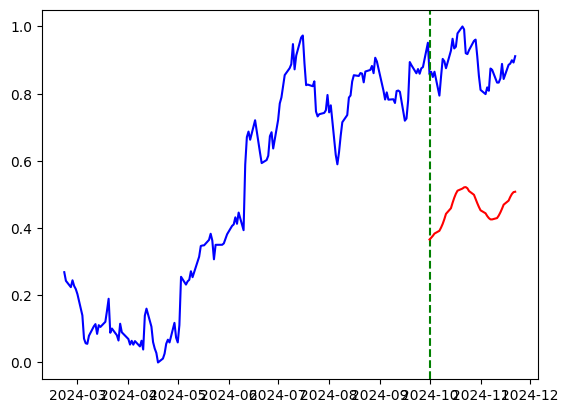

In [107]:
plt.plot(data.index[60:], y, label='All', color='blue')
plt.axvline(x=X_test_date[0], color='green', linestyle='--', label='Vertical Line')
plt.plot(X_test_date, y_pred, label='Predicted', color='red')

In [105]:
X_test_date

DatetimeIndex(['2024-10-01 00:00:00-04:00', '2024-10-02 00:00:00-04:00',
               '2024-10-03 00:00:00-04:00', '2024-10-04 00:00:00-04:00',
               '2024-10-07 00:00:00-04:00', '2024-10-08 00:00:00-04:00',
               '2024-10-09 00:00:00-04:00', '2024-10-10 00:00:00-04:00',
               '2024-10-11 00:00:00-04:00', '2024-10-14 00:00:00-04:00',
               '2024-10-15 00:00:00-04:00', '2024-10-16 00:00:00-04:00',
               '2024-10-17 00:00:00-04:00', '2024-10-18 00:00:00-04:00',
               '2024-10-21 00:00:00-04:00', '2024-10-22 00:00:00-04:00',
               '2024-10-23 00:00:00-04:00', '2024-10-24 00:00:00-04:00',
               '2024-10-25 00:00:00-04:00', '2024-10-28 00:00:00-04:00',
               '2024-10-29 00:00:00-04:00', '2024-10-30 00:00:00-04:00',
               '2024-10-31 00:00:00-04:00', '2024-11-01 00:00:00-04:00',
               '2024-11-04 00:00:00-05:00', '2024-11-05 00:00:00-05:00',
               '2024-11-06 00:00:00-05:00', '2024-1

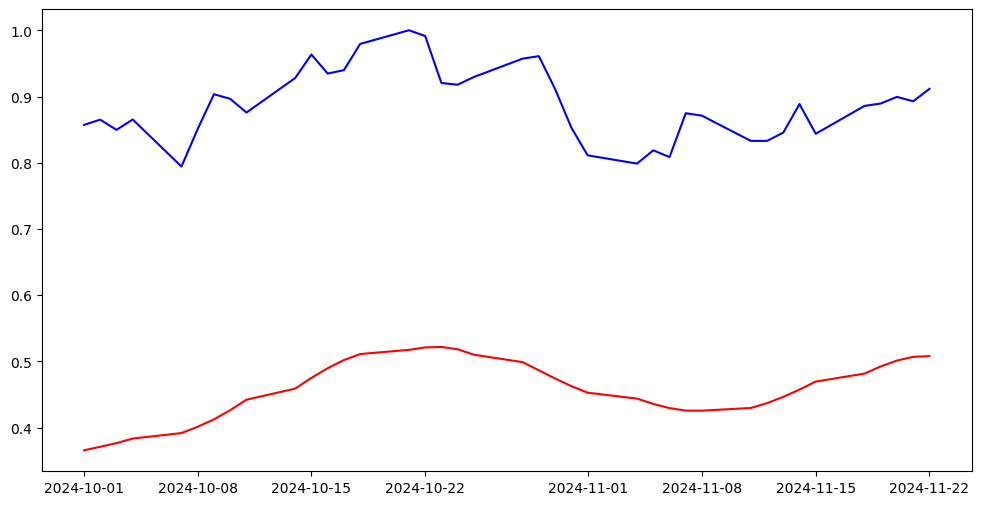

In [97]:
X_test_date = data.index[-len(X_test):]

plt.figure(figsize=(12, 6))
plt.plot(X_test_date, y_test, label='Actual', color='blue')
plt.plot(X_test_date, y_pred, label='Predicted', color='red')

In [ ]:
!pip install mplfinance -qqq
import pandas as pd
import mplfinance as mpf
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with the fetched AAPL stock data
# Make sure it contains Open, High, Low, Close, and Volume columns

# Creating a list of dates for the predictions
last_date = data.index[-1]
next_day = last_date + pd.Timedelta(days=1)
prediction_dates = pd.date_range(start=next_day, periods=4)

# Assuming 'predicted_prices' is your list of predicted prices for the next 4 days
predictions_df = pd.DataFrame(index=prediction_dates, data=predicted_prices, columns=['Close'])

# Plotting the actual data with mplfinance
mpf.plot(data, type='candle', style='charles', volume=True)

# Overlaying the predicted data
plt.figure(figsize=(10,6))
plt.plot(predictions_df.index, predictions_df['Close'], linestyle='dashed', marker='o', color='red')

plt.title("AAPL Stock Price with Predicted Next 4 Days")
plt.show()


### Inference
* inference for new data that is constantly changing
*